<a href="https://colab.research.google.com/github/Machocho254/Mental_Heath_Analysis/blob/master/Moringa_Data_Science_Core_W2_Independent_Project_2019_11_Machocho_Mengo_Python_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **FINANCIAL INCLUSION IN EAST AFRICA**

Having a bank account is an indicator of financial inclusion. 
Therefore, access to bank accounts is an essential contributor to long-term economic growth.

This research problem is to figure out how we can predict which individuals are most likely to have or use a bank account and find the factors contributing to financial inclusion. 



# **a) Specifying the Research Question**

The research problem is to figure out how we can predict which individuals are most likely to have or use a bank account. THe solution should help provide an indication of the state of financial inclusion in Kenya, Rwanda, Tanzania, and Uganda, while providing insights into some of the key demographic factors that might drive individuals’ financial outcomes. 

# **b) Defining the success metric**


1.  Find and deal with outliers, anomalies, and missing data within the dataset.
2.   Plot univariate and bivariate summaries recording your observations.
3.   Implement the solution by performing the respective analysis i.e. factor analysis, principal component analysis, and discriminant analysis.








# **Data** **Information**

The main dataset contains demographic information and what financial services are used by individuals across East Africa. This data was extracted from various Finscope surveys ranging from 2016 to 2018. 


The dataset for this research problem can be found in the link provided below:
http://bit.ly/FinancialDataset

The dataset variable definitions are found in the link below:
http://bit.ly/VariableDefinitions


# ***Reading the Data***

In [0]:
# importing all the necessary python librarries.
import pandas as pd #Data manipulation and analysis
import numpy as np #Numerical Processing on arrays and matrices
import matplotlib.pyplot as plt #Generating visualizations
import seaborn as sns #Visualizations based on matplot lib
import pandas_profiling as pp
from matplotlib.ticker import StrMethodFormatter
%matplotlib inline

In [2]:
# uploading the datasets 
financial_df = pd.read_csv("/content/Financial Dataset - 1.csv")
financial_df.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


# Checking the **Data**

In [3]:
# determining the number of records in the data
financial_df.shape

(23524, 13)

In [4]:
# previewing the top of our dataset
financial_df.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [5]:
# previewing the dataset
financial_df.tail()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


In [6]:
# checking whether all columns have the right dataset
financial_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
country                   23510 non-null object
year                      23524 non-null int64
uniqueid                  23524 non-null object
Has a Bank account        23488 non-null object
Type of Location          23509 non-null object
Cell Phone Access         23513 non-null object
household_size            23496 non-null float64
Respondent Age            23490 non-null float64
gender_of_respondent      23490 non-null object
The relathip with head    23520 non-null object
marital_status            23492 non-null object
Level of Educuation       23495 non-null object
Type of Job               23494 non-null object
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


# **External Data Source Validation **

Making sure your data matches something outside of the dataset is very important. It allows you to ensure that the measurements are roughly in line with what they should be and it serves as a check on what other things might be wrong in your dataset. External validation can often be as simple as checking your data against a single number, as we will do here.

# **Tidying the Dataset ** 


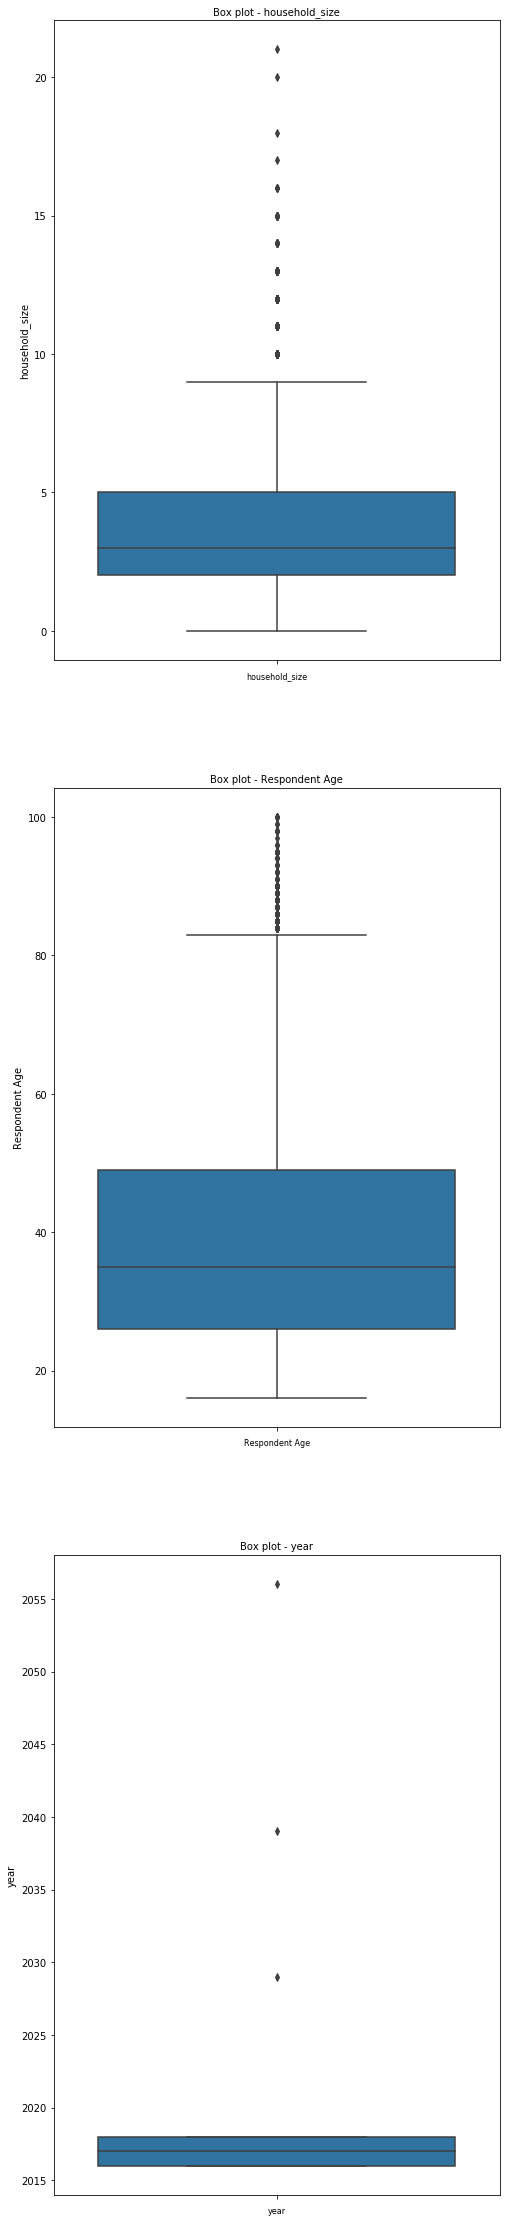

In [7]:
# checking for outliers
col_names = ['household_size', 'Respondent Age', 'year']

fig, ax = plt.subplots(len(col_names), figsize=(8,40))

for i, col_val in enumerate(col_names):

    sns.boxplot(y=financial_df[col_val], ax=ax[i])
    ax[i].set_title('Box plot - {}'.format(col_val), fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)

plt.show()

In [8]:
# checking for missing values
financial_df.isnull()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,False,False,False,False,False,False,False,False,False,False,False,False,False
23520,False,False,False,False,False,False,False,False,False,False,False,False,False
23521,False,False,False,False,False,False,False,False,False,False,False,False,False
23522,False,False,False,False,False,False,False,False,False,False,False,False,False


Before checking for anomalies, fill in the missing values. 

For the variable "year" we will use mode to fill in the missing values. 

For the variable "household_size" we will use the mean to fill in missing values. 

For the variable "Respondent Age", use median to fill in missing values. 

In [0]:
# filling in missing values
# finding the mode year of the dataset
financial_df['year'].mode()

# finding the mean of the household size
financial_df['household_size'].mean()

# finding the median of the respondent age
financial_df['Respondent Age'].median()

# filling the missing values of the Year column with the mode
financial_df['year'] = financial_df['year'].replace(np.nan, financial_df['year'].mode())

# filling in missing values of the household size column with the mean
financial_df['household_size'] = financial_df['household_size'].replace(np.nan, financial_df['household_size'].mean())

# filling in missing values of the Respondent Age column
financial_df['Respondent Age'] = financial_df['Respondent Age'].replace(np.nan, financial_df['Respondent Age']).median()


# # ValueError: cannot convert float NaN to integer

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


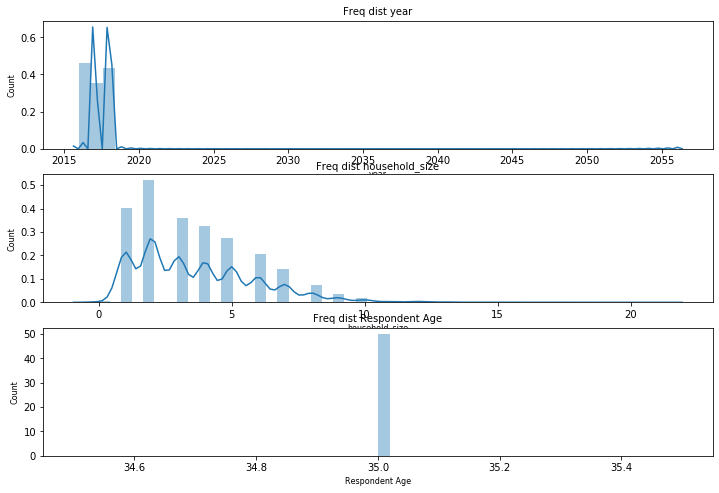

In [18]:
# Checking for Anomalies
col_names = ['year', 'household_size', 'Respondent Age']

fig, ax = plt.subplots(len(col_names), figsize=(12,8))

for i, col_val in enumerate(col_names):

    sns.distplot(financial_df[col_val], hist=True, ax=ax[i])
    ax[i].set_title('Freq dist '+col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    ax[i].set_ylabel('Count', fontsize=8)

plt.show()

# **UNIVARIATE ANALYSIS**

## **Exploratory** **Data** **Ananlysis** 

Measures of central tendencies for the three columns:


1.   Year
2.   Size of Household
3.   Age of the Respondent



# *MEAN* 

In [0]:
# Finding mean of year
financial_df['year'].mean()

In [0]:
# finding mean of household size
financial_df['household_size'].mean()

In [0]:
# finding mean of the age of respondent
financial_df['Respondent Age'].mean()

# *MODE*

In [0]:
# finding the mode for the year
financial_df['year'].mode()

In [0]:
# mode of HOusehold size
financial_df['household_size'].mode()

In [0]:
# mode of respondent age
financial_df['Respondent Age'].mode()

# *MEDIAN*

In [0]:
# MEDIAN Of the year
financial_df['year'].median()

In [0]:
# median of household size
financial_df['household_size'].median()

In [0]:
# median of respondent age 
financial_df['Respondent Age'].median()

# **MEASURES OF DISPERSION**
FInd the:


1.   Variance 
2.   Standard Deviation
3.   RAnge
4.   Skewness
5.   Quantiles
6.   Kurtosis



In [0]:
# variance of year
financial_df['year'].var()

# standard deviation 
financial_df['year'].std()

# range 
max = financial_df['year'].max()
min = financial_df['year'].min
range = max - min

# skewness
financial_df['year'].skew()

# quantiles
financial_df['year'].quantile([.25, .5, .75])

# kurtosis
financial_df['year'].kurt()


In [0]:
# variance of household size
financial_df['household_size'].var()

# standard deviation
financial_df['household_size'].std()

# range
max = financial_df['household_size'].max()
min = financial_df['household_size'].min()
range = max - min

# skewness
financial_df['household_size'].skew()

# quantiles
financial_df['household_size'].quantile([.25, .5, .75])

# kurtosis
financial_df['household_size'].kurt()

In [0]:
# measures of dispersion for Respondent age
# variance 
financial_df['Respondent Age'].var()

# standard deviation
financial_df['Respondent Age'].std()

# range
max = financial_df['Respondent Age'].max()
min = financial_df['Respondent Age'].min()
range = max - min

# skewness
financial_df['Respondent Age'].skew()

# quantiles
financial_df['Respondent Age'].quantiles([.25, .5, .75])

# kurtosis
financial_df['Respondent Age'].kurt()

# BIVARIATE ANALYSIS 